# IKEA DATA ANALYSIS

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('IKEA_SA_Furniture_Web_Scrapings_sss.csv')

In [3]:
df.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [4]:
df.shape

(3694, 14)

In [5]:
df.columns

Index(['Unnamed: 0', 'item_id', 'name', 'category', 'price', 'old_price',
       'sellable_online', 'link', 'other_colors', 'short_description',
       'designer', 'depth', 'height', 'width'],
      dtype='object')

In [6]:
df.dtypes

Unnamed: 0             int64
item_id                int64
name                  object
category              object
price                float64
old_price             object
sellable_online         bool
link                  object
other_colors          object
short_description     object
designer              object
depth                float64
height               float64
width                float64
dtype: object

In [7]:
df.isnull().sum()

Unnamed: 0              0
item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64

# 1.Which IKEA furniture is sold most?

In [8]:
#This gives the type of furniture that was sold the most

df.short_description.value_counts(ascending=False)

        Chair                                                          59
        Table,          120x60 cm                                      40
        Table,          150x75 cm                                      36
        Armchair                                                       30
        3-seat sofa                                                    30
                                                                       ..
        Frame/mesh baskts/clths rl/shlv uts,          173x51x173 cm     1
        Shelving unit,          92x36x94 cm                             1
        Wall-mounted shelf combination,          86x25x176 cm           1
        Storage combination,          276x214 cm                        1
        TV storage combination/glass doors,          276x41x95 cm       1
Name: short_description, Length: 1706, dtype: int64

In [9]:
#This gives the name of the IKEA furniture that was sold the most

df.name.value_counts()

BESTÅ                173
PAX                  111
GRÖNLID               83
TROFAST               74
BEKANT                74
                    ... 
LINDVED                1
PAX / VINGROM          1
HILVER / GODVIN        1
PAX / MEHAMN/AULI      1
BRYNILEN               1
Name: name, Length: 607, dtype: int64

# 2. Count the different categories of Furniture

In [10]:
df.category.value_counts()

Tables & desks                          612
Bookcases & shelving units              548
Chairs                                  481
Sofas & armchairs                       428
Cabinets & cupboards                    292
Wardrobes                               236
Outdoor furniture                       216
Beds                                    208
TV & media furniture                    190
Chests of drawers & drawer units        125
Children's furniture                    124
Nursery furniture                        97
Bar furniture                            47
Trolleys                                 28
Café furniture                           26
Sideboards, buffets & console tables     23
Room dividers                            13
Name: category, dtype: int64

# 3. Create a separate data frame using columns:  Category and Price. Sort the data by category in ascending order.



In [11]:
#This gives a new data frame where the column is in ascending order of Category and price.

df_cp=df.sort_values(by=['category','price'], ascending=True).reset_index()
df_cp.drop(columns='index', inplace=True)
df_cp.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,34,20336619,HENRIKSDAL,Bar furniture,40.0,No old price,True,https://www.ikea.com/sa/en/p/henriksdal-cover-...,No,Cover for bar stool with backrest,IKEA of Sweden,NaN,NaN,NaN
1,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
2,6,70404875,FRANKLIN,Bar furniture,129.0,No old price,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0
3,8,50406465,FRANKLIN,Bar furniture,129.0,No old price,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0
4,17,50363649,KULLABERG,Bar furniture,140.0,SR 175,True,https://www.ikea.com/sa/en/p/kullaberg-stool-b...,Yes,Stool,Sarah Fager,36.0,NaN,36.0


# 4. Show in a bar chart diagram the price and the old_price of furniture. Explain if there is anything interesting.



In [12]:
df.old_price.value_counts()

No old price    3040
SR 995            12
SR 1,385          11
SR 595            10
SR 275             8
                ... 
SR 776             1
SR 1,985           1
SR 2,105           1
SR 3,425           1
SR 8,735           1
Name: old_price, Length: 365, dtype: int64

We see that 3040 furnitures have no old price.Lets modify the dataframe and remove all those rows with 'No old price' for the bar diagram.


In [13]:
#Creating a new data frame and not including columns where there is no old price since we can't compare if there is no old price.

df_comp=df[df.old_price!='No old price']
df_comp.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
9,9,69304221,EKEDALEN / EKEDALEN,Bar furniture,2176.0,"SR 2,375",True,https://www.ikea.com/sa/en/p/ekedalen-ekedalen...,No,Bar table and 4 bar stools,Ehlén Johansson,NaN,NaN,NaN
13,13,50420329,FREKVENS,Bar furniture,177.0,SR 295,True,https://www.ikea.com/sa/en/p/frekvens-bar-stoo...,No,"Bar stool with backrest, in/outdoor, ...",Nicholai Wiig Hansen,53.0,104.0,43.0
17,17,50363649,KULLABERG,Bar furniture,140.0,SR 175,True,https://www.ikea.com/sa/en/p/kullaberg-stool-b...,Yes,Stool,Sarah Fager,36.0,NaN,36.0
23,23,90400517,EKEDALEN,Bar furniture,796.0,SR 995,True,https://www.ikea.com/sa/en/p/ekedalen-bar-tabl...,No,"Bar table, 120x80 cm",Ehlén Johansson,NaN,105.0,80.0
26,26,40400529,EKEDALEN,Bar furniture,796.0,SR 995,True,https://www.ikea.com/sa/en/p/ekedalen-bar-tabl...,No,"Bar table, 120x80 cm",Ehlén Johansson,NaN,105.0,80.0


In [14]:
df_comp.shape

(654, 14)

In [15]:
# As we are suppose to change the old price into integer, first lets remove 'SR', and ',' from them for simplicity.

df_comp.old_price=df_comp.old_price.str.replace('SR ','').str.replace(',','')
df_comp.old_price

C:\Users\Rocky\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


9       2375
13       295
17       175
23       995
26       995
        ... 
3689     820
3690    1755
3691    1050
3692    3130
3693    1535
Name: old_price, Length: 654, dtype: object

Here, we see the data has been changed to numbers only but it is still string values. 

Lets change the column old prices to numeric. And also convert any values that can't be converted into numeric to Null value.

In [48]:
#Changing the column old_price from string to numeric values.
#And checking if there were any null values present in that column

df_comp['old_price']=pd.to_numeric(df_comp.old_price , errors='coerce')
df_comp.isnull().sum()

<ipython-input-48-033f5b1e971c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp['old_price']=pd.to_numeric(df_comp.old_price , errors='coerce')


Unnamed: 0             0
item_id                0
name                   0
category               0
price                  0
old_price             10
sellable_online        0
link                   0
other_colors           0
short_description      0
designer               0
depth                245
height               165
width                 87
dtype: int64

In [18]:
#Lets remove all the rows with null values so that we end up with values where we have both old price and new price.
df_comp1=df_comp[df_comp.old_price.notnull()]

In [19]:
df_comp1.shape

(644, 14)

In [20]:
# Checking again if there is any null value present in the column old_price

df_comp1.old_price.isnull().sum()

0

In [23]:

df_comp.dtypes

Unnamed: 0             int64
item_id                int64
name                  object
category              object
price                float64
old_price            float64
sellable_online         bool
link                  object
other_colors          object
short_description     object
designer              object
depth                float64
height               float64
width                float64
dtype: object

In [22]:
df_plot1=pd.DataFrame(df_comp1.groupby('category').price.mean())
df_plot2=pd.DataFrame(df_comp1.groupby('category').old_price.mean())

In [24]:
df_plot1.head()

,price
category,
Bar furniture,1117.666667
Beds,2639.488889
Bookcases & shelving units,603.594937
Cabinets & cupboards,858.983333
Café furniture,417.333333


In [25]:
df_plot=pd.concat([df_plot2,df_plot1], axis=1)
df_plot

,old_price,price
category,,
Bar furniture,1262.777778,1117.666667
Beds,3116.888889,2639.488889
Bookcases & shelving units,685.050633,603.594937
Cabinets & cupboards,1028.666667,858.983333
Café furniture,521.666667,417.333333
Chairs,1228.750000,1071.700000
Chests of drawers & drawer units,1000.358491,800.858491
Children's furniture,328.750000,271.750000
Nursery furniture,507.500000,406.000000


In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

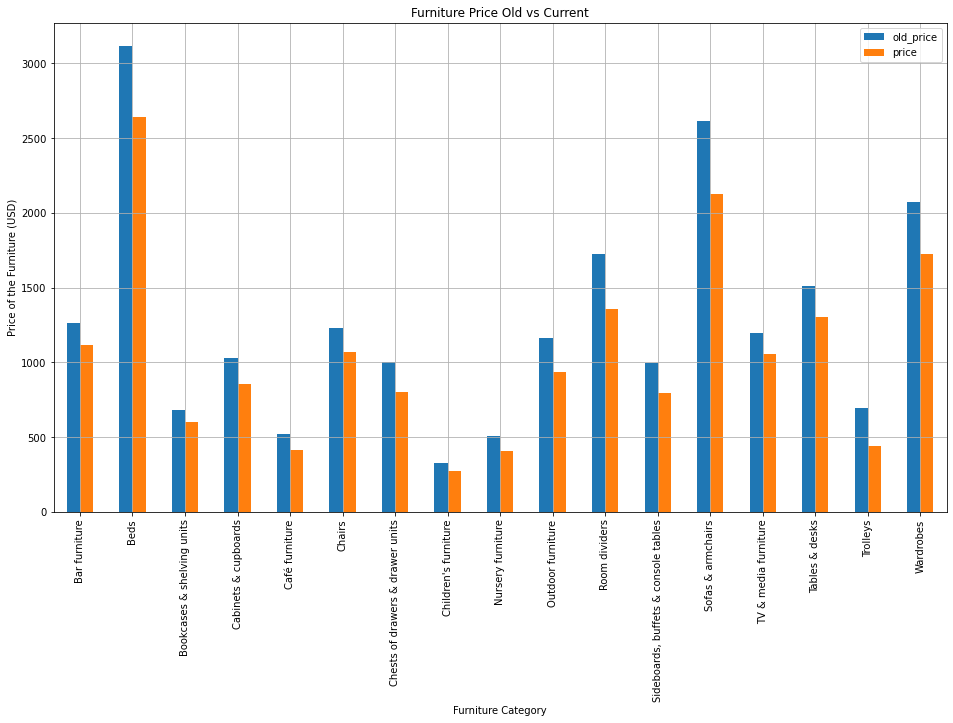

In [43]:
df_plot.plot(kind='bar', figsize=(16,9))
plt.title('Furniture Price Old vs Current')
plt.xlabel('Furniture Category')
plt.ylabel('Price of the Furniture (USD)')
plt.grid()
plt.legend()
plt.show()


From the bar graph we can see that, on average, the price of each furniture has decreased over time.